In [33]:
import numpy as np
import os
from CoPhaser import utils
from CoPhaser import plotting
import sys

sys.path.insert(0, "../set_up")  # add set_up path to search list

import plot_helpers
import constants

from scipy.stats import pearsonr
from scipy.sparse import csr_matrix, hstack, vstack

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import anndata
import scanpy as sc
import pickle
import pandas as pd

In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
DATA_FOLDER = "../figure_2/data"

height_ratios_scaling: [1, 1]


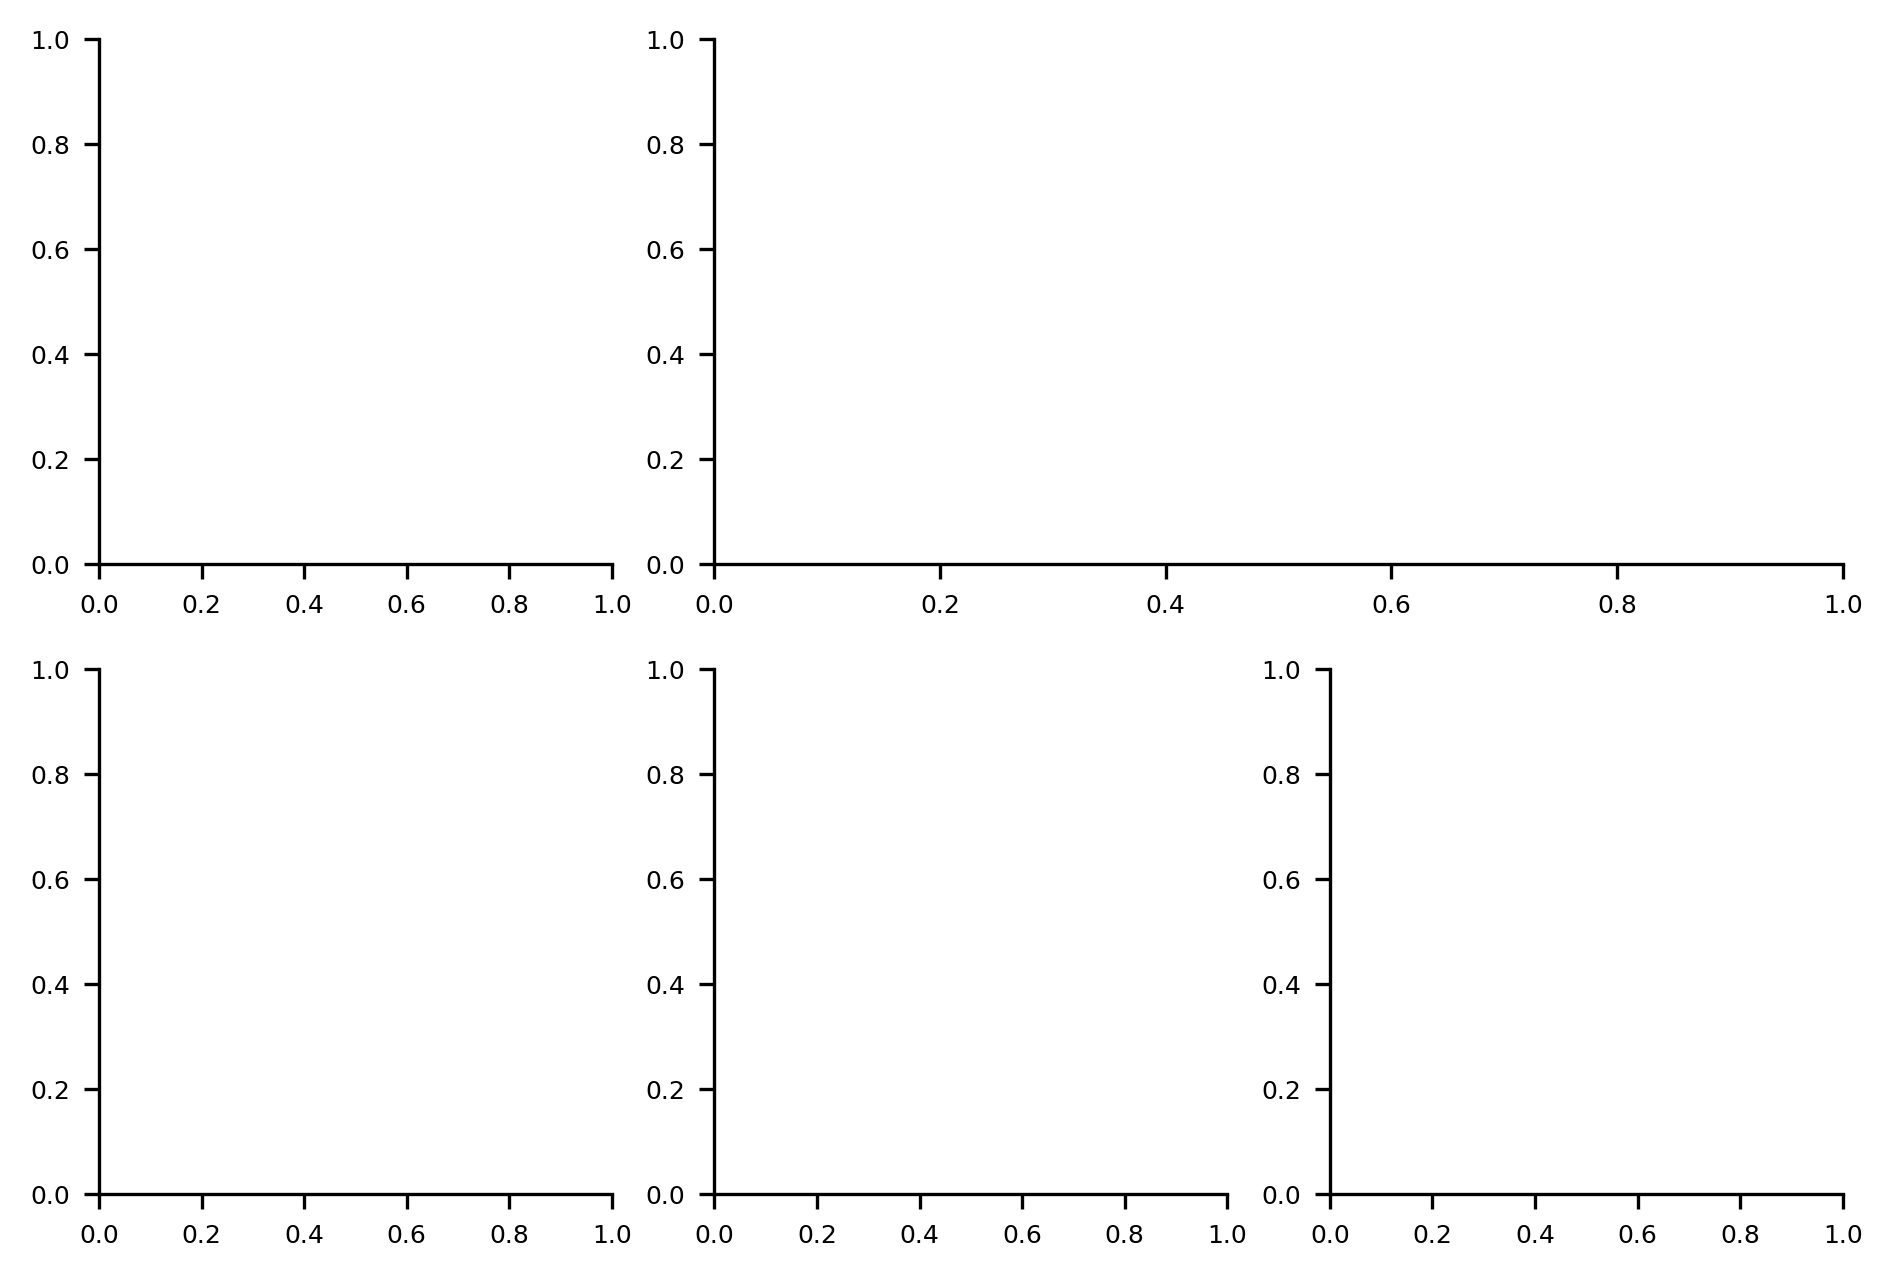

In [36]:
mosaic = [["A", "B", "B"], ["C", "D", "E"]]
fig, axs = plot_helpers.create_pannels(mosaic=mosaic, h_pad=0)

In [37]:
battich = pickle.load(open(os.path.join(DATA_FOLDER, "battich_results.pkl"), "rb"))

In [38]:
battich["df_mean"]

,NPAT,ZSCAN16,PDCD7,TLCD2,PRPF38B,AP3S2,TMEM107,H1-2,CDPF1,IQCC,...,ZNF350,ZNF292,ARHGAP33,LGALS8,CDC20,PCGF2,KCNAB3,inferred_theta,pca_theta,theta_fucci
0,0.040760,0.005932,0.031574,0.019772,0.361833,0.024355,0.013180,0.001601,0.013476,0.001783,...,0.013525,0.156483,0.019024,0.181624,0.029036,0.499342,0.003340,-2.094450,2.507310,-1.026254
1,0.078753,0.008961,0.055858,0.033902,0.623469,0.034534,0.015888,0.003072,0.020721,0.003189,...,0.023822,0.303162,0.020679,0.231157,0.020418,0.599974,0.011091,-1.959531,-2.905382,-1.277581
2,0.204770,0.019781,0.104822,0.055164,1.225155,0.050155,0.068834,0.013761,0.036223,0.003708,...,0.028875,0.574620,0.026194,0.428472,0.020262,1.071051,0.019175,-1.628549,-2.951921,-0.963422
3,0.057101,0.009658,0.033185,0.016879,0.351426,0.021460,0.011482,0.005104,0.017199,0.000718,...,0.011688,0.149325,0.017962,0.139794,0.008974,0.322299,0.017001,-1.308107,2.806668,-1.403245
4,0.010027,0.009895,0.016783,0.005193,0.176853,0.017139,0.026319,0.002236,0.007421,0.001717,...,0.005231,0.070070,0.028402,0.126295,0.885865,0.270682,0.001909,3.068291,0.722826,-2.408554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,0.119977,0.003708,0.030698,0.001853,0.315992,0.005488,0.041247,0.020458,0.010667,0.014574,...,0.010424,0.158393,0.029012,0.050138,0.065613,0.215880,0.003456,0.253274,-1.871012,0.691150
2301,0.049566,0.014045,0.045313,0.004620,0.371044,0.017162,0.044547,0.012869,0.011411,0.008035,...,0.010302,0.213682,0.019924,0.089811,0.609827,0.209310,0.013604,2.470814,-1.319595,-2.303835
2302,0.248009,0.029160,0.071380,0.013842,0.849755,0.014227,0.156811,0.051516,0.020070,0.024660,...,0.027053,0.368659,0.123184,0.141409,0.302914,0.420021,0.007943,0.905474,-1.373615,0.544543
2303,0.154738,0.019320,0.084751,0.018530,0.871960,0.029933,0.030782,0.023194,0.037347,0.003784,...,0.021615,0.398673,0.035249,0.220807,0.029916,0.535195,0.035902,-1.031525,-2.881436,-1.235693


In [39]:
battich

{'cells_indices': array(['Cell_00002', 'Cell_00004', 'Cell_00005', ..., 'Cell_05420',
        'Cell_05421', 'Cell_05422'], dtype=object),
 'df_rhythmic':           NPAT   ZSCAN16     PDCD7     TLCD2   PRPF38B     AP3S2   TMEM107  \
 0    -0.609823 -0.835881 -0.361358  0.824570 -0.230183  0.160066 -1.049128   
 1    -0.536024 -0.849011 -0.423448  0.916016 -0.288976  0.170656 -1.031609   
 2    -0.390407 -0.530212 -0.452931  0.724628 -0.353341  0.115366 -0.746307   
 3    -0.521686 -0.421981 -0.623891  0.573491 -0.537271  0.054371 -0.917525   
 4    -1.472894  0.123477 -0.391625 -0.073515 -0.383479  0.192026 -0.168599   
 ...        ...       ...       ...       ...       ...       ...       ...   
 2300  1.147503 -0.409059  0.327427 -0.737402  0.347831 -0.339207  0.811997   
 2301 -0.368485  0.378213  0.054326 -0.377717 -0.140397  0.296874  0.546286   
 2302  1.197734  0.844996  0.514398  0.495466  0.664966 -0.256261  1.240430   
 2303 -0.326533 -0.240206 -0.404158  0.014577 -0.387036 -

In [40]:
def mean_to_cp10k(adata, df_mean, layer="spliced"):
    """Convert mean expression to log2 CP10k."""
    library_size = adata.layers[layer].sum(axis=1).flatten()
    df_mean_cp10k = df_mean.copy()
    df_mean_cp10k.iloc[:, :-3] = np.log2(
        df_mean_cp10k.iloc[:, :-3].div(library_size, axis=0) * 10**4 + 1
    )
    return df_mean_cp10k


def plot_gene_reconstruction(
    adata,
    df_mean,
    ax_position,
    gene_names=[
        "MCM6",
        "PCNA",
        "TOP2A",
    ],
    fig=fig,
    hue=None,
    axs=axs,
    legend=True,
):
    axs = plot_helpers.replace_mosaic_cell_with_grid(
        fig, axs, label=ax_position, nrows=1, ncols=len(gene_names)
    )
    df_mean_cp10k = mean_to_cp10k(adata, df_mean, layer="spliced")
    if hue is not None:
        # drop hue with less than 10 samples
        counts = adata.obs[hue].value_counts()
        valid_hues = counts[counts >= 10].index
        valid_indices = adata.obs[hue].values.isin(valid_hues)
        df_mean_cp10k = df_mean_cp10k[valid_indices]
        adata = adata[valid_indices]
        hue = adata.obs[hue].values
    for i, gene_name in enumerate(gene_names):
        _, axs[ax_position][i] = plotting.modify_axis_labels(
            ax=axs[ax_position][i], axis="x", step=0.5
        )

        plotting.plot_smoothed_profiles(
            x=df_mean_cp10k["inferred_theta"],
            y=df_mean_cp10k[gene_name],
            ax=axs[ax_position][i],
            hue=hue,
            legend=legend,
            ylabel="Normalized Counts (log)" if i == 0 else None,
            xlabel="Inferred Phase",
            title=gene_name,
        )

    return axs

In [41]:
adata = anndata.read_h5ad(
    "/home/maxine/Documents/paychere/cell_cycle_VAE_Fourrier_model/data/battich/Battich_RPE1_labeled.loom"
)
adata = adata[battich["cells_indices"]].copy()
adata.var_names = adata.var.Symbol

/home/maxine/miniconda3/envs/VAE_Fourrier_Env/lib/python3.12/site-packages/anndata/_core/anndata.py:845: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['TSPAN6', 'DPM1', 'SCYL3', 'C1orf112', 'CFH']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


In [42]:
plotting.plot_z_space_paper(
    battich["z"]["z1"],
    battich["z"]["z2"],
    ax=axs["A"],
    alpha=0.7,
    hue=adata.obs["Condition_Id"],
    legend=True,
)
sns.move_legend(
    axs["A"],
    title="Condition ID",
    loc="upper left",
    bbox_to_anchor=(0.95, 1),
    frameon=False,
)
# # extract legend items from axis A
# handles, labels = axs["A"].get_legend_handles_labels()

# # remove axis legend (so tight_layout won't consider it)
# axs["A"].get_legend().remove()

# # place legend at the figure level instead, outside panel A
# fig.legend(
#     handles,
#     labels,
#     loc="upper left",
#     bbox_to_anchor=(0.98, 0.95),  # adjust to position where you want it
#     title="Condition ID",
# )

In [43]:
axs = plot_gene_reconstruction(
    adata,
    battich["df_mean"],
    ax_position="B",
    hue="Condition_Id",
    legend=False,
)

In [44]:
plotting.plot_phase_accuracy(
    battich["df_mean"]["pca_theta"],
    battich["df_mean"]["inferred_theta"],
    title_gt="PCA Phase",
    title_pred="Inferred Phase",
    title="Phases Comparison",
    ax=axs["C"],
)

In [45]:
adata.obs["Condition_Id"].str.startswith("Pulse")

Cell_00002    False
Cell_00004    False
Cell_00005    False
Cell_00007    False
Cell_00008    False
              ...  
Cell_05416     True
Cell_05418     True
Cell_05420     True
Cell_05421     True
Cell_05422     True
Name: Condition_Id, Length: 2305, dtype: bool

In [46]:
ax = axs["D"]
indices_pulse = adata.obs["Condition_Id"].str.startswith("Chase").values


def align_phase(phase, reference_phase):
    return utils.align_phases(phase, reference_phase)


plotting.modify_axis_labels(ax=ax, axis="x", step=0.5)
plotting.plot_smoothed_profiles(
    battich["df_mean"]["theta_fucci"][indices_pulse],
    adata.layers["spliced"].sum(axis=1)[indices_pulse],
    ax=ax,
    label="FUCCI",
)
plotting.plot_smoothed_profiles(
    align_phase(
        battich["df_mean"]["inferred_theta"][indices_pulse],
        battich["df_mean"]["theta_fucci"][indices_pulse],
    ),
    adata.layers["spliced"].sum(axis=1)[indices_pulse],
    ax=ax,
    label="Inferred",
)
plotting.plot_smoothed_profiles(
    align_phase(
        battich["df_mean"]["pca_theta"][indices_pulse],
        battich["df_mean"]["theta_fucci"][indices_pulse],
    ),
    adata.layers["spliced"].sum(axis=1)[indices_pulse],
    ax=ax,
    label="PCA",
)
ax.legend(title="Phases")
ax.set_xlabel("Phase")
ax.set_ylabel("Mean #UMI")
ax.set_title("#UMI vs Inferred Phase")

Text(0.5, 1.0, '#UMI vs Inferred Phase')

In [47]:
axs = plot_helpers.make_polar(axs, "E")
best_shift = utils.get_best_shift_direction(
    battich["df_rhythmic"]["inferred_theta"], battich["df_rhythmic"]["theta_fucci"]
)
best_shift = best_shift["shift"]
plotting.plot_cell_cycle(battich["df_rhythmic"], ax=axs["E"], shift=best_shift)

/home/maxine/Documents/paychere/cell_cycle_VAE_Fourrier_model/src/CoPhaser/plotting.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


/home/maxine/Documents/paychere/cell_cycle_VAE_Fourrier_model/paper/code/figure_S2/../set_up/plot_helpers.py:89: UserWarning: Rasterization of 'Line2D(_child1)' will be ignored
  artist.set_rasterized(True)


Figure saved to: /home/maxine/Documents/paychere/cell_cycle_VAE_Fourrier_model/paper/figures/figure_S2_Battich.svg


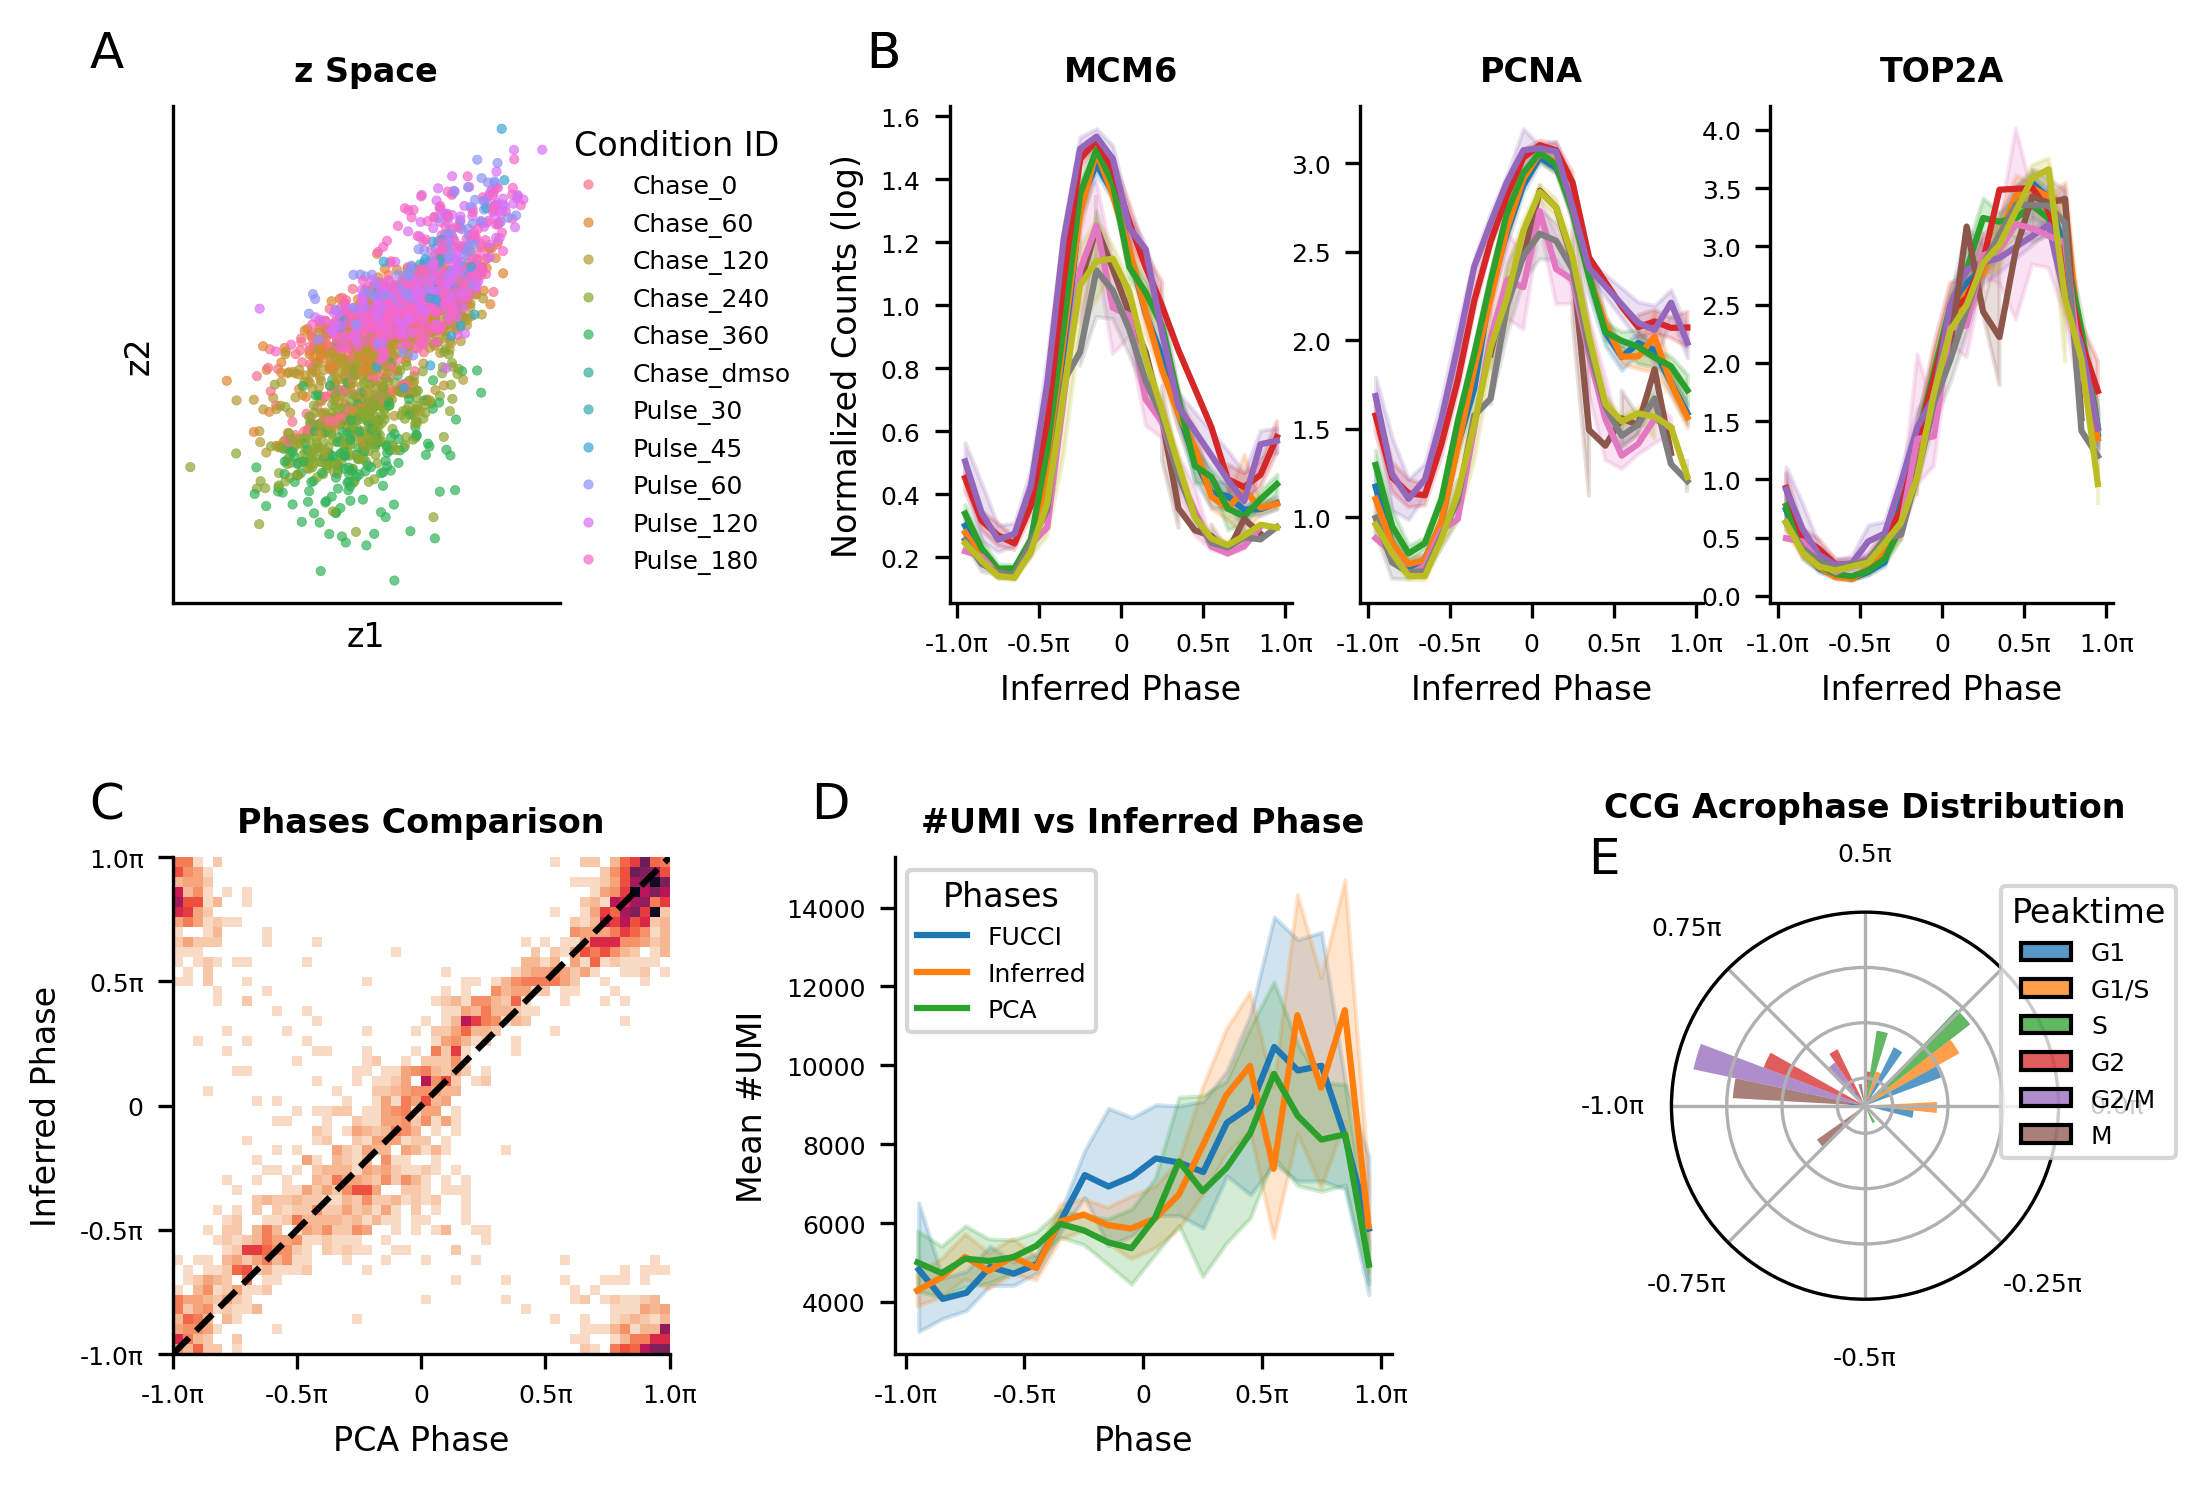

In [48]:
plot_helpers.label_panels_mosaic(fig, axs, mosaic)
plot_helpers.save_figure(
    fig, axs, "figure_S2_Battich", uncompressed_rows=[0], mosaic=mosaic, wpad=0.1
)